# TALib 套件安裝

TA-Lib (Technical Analysis Library)，提供超過 150 種技術指標計算函式

官網：https://github.com/mrjbq7/ta-lib

In [125]:
# 查詢 python 版本，依版本安裝相對應的 Ta-Lib package

import sys
sys.version

'3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]'

# 認識 TALib 套件

官網文件：http://mrjbq7.github.io/ta-lib/doc_index.html

TA-Lib 有兩種使用方式：Function API & Abstract API

In [126]:
import talib
import pandas as pd

# 透過『get_functions』函式，查看 TA-Lib 提供的技術指標
all_ta_label = talib.get_functions()

# 查看清單
print('技術指標個數: ', len(all_ta_label))  # 技術指標個數
#all_ta_label

# 透過『get_function_groups』，取得分類後的技術指標清單
all_ta_groups = talib.get_function_groups()

# 查看所有類別的指標數量
table = pd.DataFrame({
            '技術指標類別': list(all_ta_groups.keys()),
            '指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
table

# 查看各類別指標
#print(len(all_ta_groups))
#print(all_ta_groups)

# 查看某類別下的技術指標清單
#print(all_ta_groups['Momentum Indicators'])

技術指標個數:  158


,技術指標類別,指標總數
0,Cycle Indicators,5
1,Math Operators,11
2,Math Transform,15
3,Momentum Indicators,30
4,Overlap Studies,17
5,Pattern Recognition,61
6,Price Transform,4
7,Statistic Functions,9
8,Volatility Indicators,3
9,Volume Indicators,3


# 讀取股價資料

計算技術指標通常需要以下資料：開盤價 open、最高價 high、最低價 low、收盤價 close，以及成交量 volume

In [11]:
import sqlite3, os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
# 建立資料庫連結
conn = sqlite3.connect(os.path.join('data', 'data.db'))

# 取 0050 近五年股價資料
sqlstr = "select sid,date,開盤價,最高價,最低價,收盤價,成交股數 \
          from price where sid='0050' and date>datetime('2015-01-01')"

# 使用 parse_dates 參數轉換資料格式
df = pd.read_sql(sqlstr, conn, index_col='date', parse_dates='date')

In [128]:
# 修改 columns 名稱：中文轉換成英文

df.rename(columns={'開盤價':'open', '收盤價':'close', '最高價':'high',
                    '最低價':'low', '成交股數':'volume'}, inplace=True)
df.tail(10)

,sid,open,high,low,close,volume
date,,,,,,
2020-03-19,0050,71.00,71.00,67.25,68.55,68038340
2020-03-20,0050,71.00,74.00,70.90,74.00,40910533
2020-03-23,0050,71.00,72.10,69.55,70.80,22465117
2020-03-24,0050,73.85,75.30,73.70,74.25,26956843
2020-03-25,0050,76.80,77.45,76.10,76.85,32687820
2020-03-25,0050,76.80,77.45,76.10,76.85,32687820
2020-03-26,0050,77.40,77.45,76.00,77.20,19215688
2020-03-27,0050,78.30,78.70,76.45,76.60,21953901
2020-03-30,0050,74.70,76.15,74.05,75.85,13605883


In [129]:
# 分別取出每一條資料值

Open = df['open']
High = df['high']
Low = df['low']
Close = df['close']
Volume = df['volume']

# TALib - Function API

In [130]:
import talib

In [27]:
# 查看函式說明

help(talib.SMA)
#help(talib.STOCH)

Help on function SMA in module talib._ta_lib:

SMA(...)
    SMA(real[, timeperiod=?])
    
    Simple Moving Average (Overlap Studies)
    
    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 30
    Outputs:
        real



In [131]:
# SMA - Simple Moving Average
# real = SMA(close, timeperiod=30)

SMA = talib.SMA(Close)
#SMA = talib.SMA(Close, timeperiod=10)  # 改變函式預設的參數值
SMA

date
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
                ...    
2020-03-25    84.351667
2020-03-26    83.826667
2020-03-27    83.303333
2020-03-30    82.796667
2020-03-31    82.265000
Length: 1280, dtype: float64

In [132]:
# STOCH - Stochastic
# slowk, slowd = STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

K, D = talib.STOCH(High,Low,Close,fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
D.head(20)

date
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
2015-01-12          NaN
2015-01-13          NaN
2015-01-14          NaN
2015-01-15          NaN
2015-01-16          NaN
2015-01-19          NaN
2015-01-20          NaN
2015-01-21    66.566952
2015-01-22    79.882269
2015-01-23    90.296352
2015-01-26    93.643551
2015-01-27    95.863439
2015-01-28    96.409538
2015-01-29    94.324507
2015-01-30    86.712814
dtype: float64

# TALib - Abstract API

In [133]:
from talib import abstract

In [40]:
# 查看函式說明

print(abstract.RSI)

RSI([input_arrays], [timeperiod=14])

Relative Strength Index (Momentum Indicators)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 14
Outputs:
    real


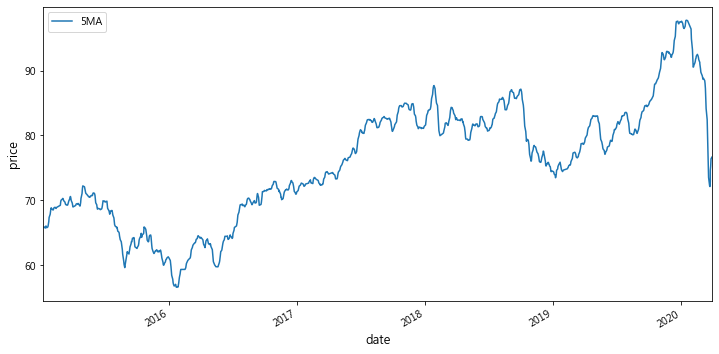

In [134]:
# SMA: 簡單移動平均線，跟股價雷同

#SMA = abstract.SMA(df)
SMA = abstract.SMA(df, timeperiod=5)  # 改變函式預設的參數值
SMA.plot(figsize=(12, 6), label="5MA")
#SMA.tail(100).plot(figsize=(12, 6), label="5MA")
#Close.tail(100).plot()  # 收盤價
plt.ylabel('price', fontsize=12)
plt.xlabel('date', fontsize=12)
plt.legend(loc='upper left', fontsize=10)  # best, upper, lower, center, left, right

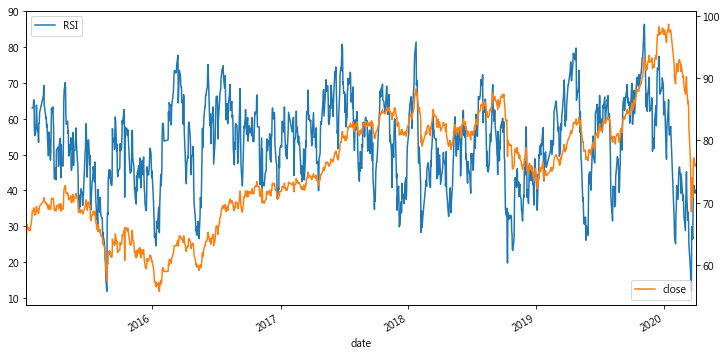

In [136]:
# RSI: Relative Strength Index，介於 0~100 之間
# RSI 低股價低，可進行買入動作

abstract.RSI(df).plot(label='RSI', figsize=(12, 6))
#abstract.RSI(df)['2019'].plot(label='RSI')
plt.legend(loc='upper left')
df['close'].plot(secondary_y = True)  # 將股價設為副座標
#df['close']['2019'].plot(secondary_y = True)
plt.legend(loc='lower right')

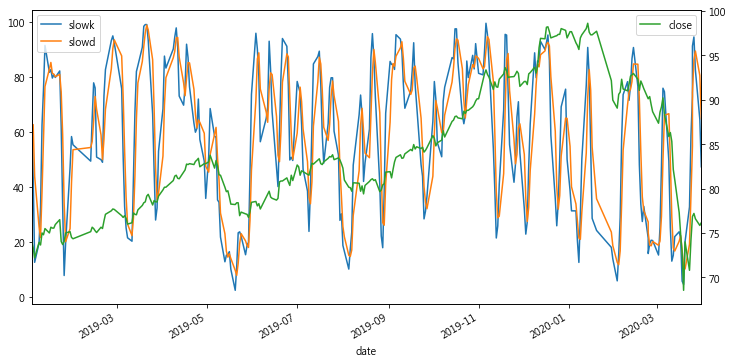

In [137]:
# KD值：STOCH, Stochastic，有兩條線 K & D
# K 走得比 D 快，K>D 黃金交叉、K<D 死亡交叉

abstract.STOCH(df)['2019':].plot(figsize=(12, 6))
df['close']['2019':].plot(secondary_y = True)
plt.legend()

# 打造看盤軟體

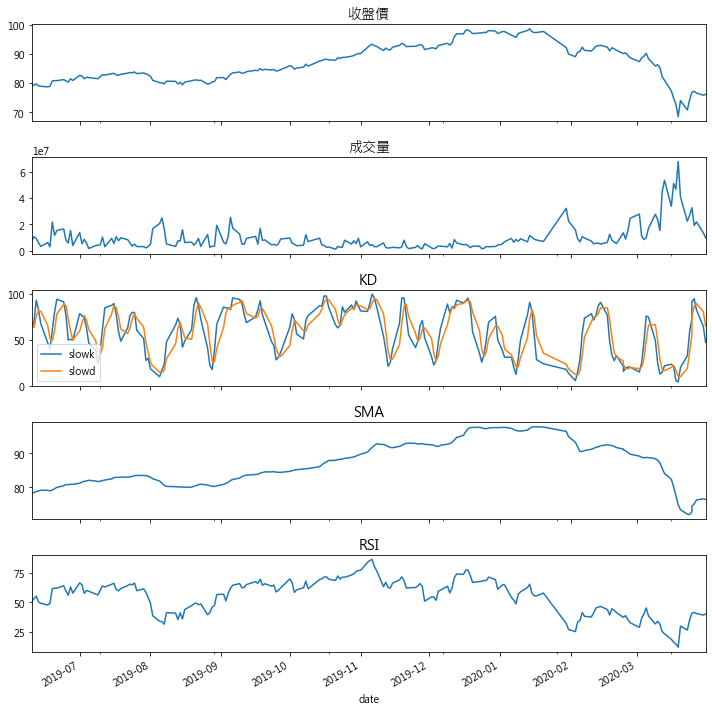

In [138]:
# 計算指標

SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)

# 繪製圖表
plt.rcParams['figure.figsize'] = (10, 10)

fig, axes = plt.subplots(nrows=5, sharex=True)

df['close'].tail(200).plot(ax=axes[0])
axes[0].set_title('收盤價', fontsize=14)
df['volume'].tail(200).plot(ax=axes[1])
axes[1].set_title('成交量', fontsize=14)
STOCH.tail(200).plot(ax=axes[2])
axes[2].set_title('KD', fontsize=14)
SMA.tail(200).plot(ax=axes[3])
axes[3].set_title('SMA', fontsize=14)
RSI.tail(200).plot(ax=axes[4])
axes[4].set_title('RSI', fontsize=14)
plt.tight_layout()